In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
X = plt.imread('./data/image1.jpg')
X.shape

(200, 300, 3)

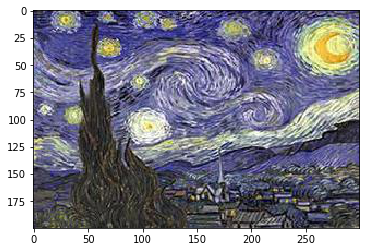

In [3]:
plt.imshow(X)

In [4]:
h, w, c = X.shape
X = X.reshape((-1, c))
X.shape

(60000, 3)

In [7]:
class GaussianMixtureModel:
    
    def __init__(self):
        pass
    
    def fit(self, X, k, n_iter = 100):
        assert len(X.shape) == 2
        n, d = X.shape
        self.n = n
        self.d = d
        # random non-uniform init for posteriors
        self.w = np.random.randint(low = 1, high = k + 1, size = (n, k)).astype('float64')
        self.w = self.w / np.sum(self.w, axis = 1)[:, None]
        # priors
        self.p = np.mean(self.w, axis = 0)
        # ML estimate of the means and covariances based on the init posteriors
        self.m = np.matmul(self.w.T, X) / np.matmul(self.w.T, np.ones((n, 1)))
        self.S = np.zeros((k, d, d))
        for i in range(k):
            self.S[i] = (1/np.sum(self.w[:, i])) * np.matmul((self.w[:, i, None]*(X - self.m[i])).T, (X - self.m[i]))
        
        self.LL = np.zeros((n_iter, ))
        # Iterations of EM algorithm
        for e in range(n_iter):
            # update posteriors to get the lower bound of likelihood - E step
            log_likelihood = 0
            for i in range(n):
                px = np.zeros((k))
                for j in range(k):
                    px[j] = self.p[j] * st.multivariate_normal.pdf(X[i], self.m[j], self.S[j])
                self.w[i] = px / np.sum(px)
                log_likelihood += np.sum(self.w[i] * np.log(px / self.w[i]))
            self.LL[e] = log_likelihood
            print('iter = {}, log likelihood = {} '.format(e + 1, log_likelihood))
            # Maximize lower bound of likelihood - M step   
            self.p = np.mean(self.w, axis = 0)
            self.m = np.matmul(self.w.T, X) / np.matmul(self.w.T, np.ones((n, 1)))
            self.S = np.zeros((k, d, d))
            for j in range(k):
                self.S[j] = (1/np.sum(self.w[:, j])) * np.matmul((self.w[:, j, None]*(X - self.m[j])).T, (X - self.m[j]))
    
    def predict(self):
        X_ml = np.zeros((self.n, self.d))
        for i in range(self.n):
            idx = np.argmax(gmm.w[i])
            X_ml[i] = gmm.m[idx]
        return X_ml        

In [8]:
gmm = GaussianMixtureModel()
gmm.fit(X, 5, n_iter = 30)

iter = 1, log likelihood = -814113.5917440734 
iter = 2, log likelihood = -812644.4043153661 
iter = 3, log likelihood = -803328.4340932601 
iter = 4, log likelihood = -796256.6464073474 
iter = 5, log likelihood = -792069.175303805 
iter = 6, log likelihood = -789590.7910005016 
iter = 7, log likelihood = -787656.8086296836 
iter = 8, log likelihood = -785956.6221362805 
iter = 9, log likelihood = -784509.3108707393 
iter = 10, log likelihood = -783331.2617630614 
iter = 11, log likelihood = -782470.9912339749 
iter = 12, log likelihood = -781891.1910561672 
iter = 13, log likelihood = -781493.9085596259 
iter = 14, log likelihood = -781200.2521335195 
iter = 15, log likelihood = -780963.0761814094 
iter = 16, log likelihood = -780757.466109942 
iter = 17, log likelihood = -780571.9349283245 
iter = 18, log likelihood = -780399.9081996164 
iter = 19, log likelihood = -780232.6422610359 
iter = 20, log likelihood = -780057.3951108778 
iter = 21, log likelihood = -779858.0447225954 
ite

Text(0,0.5,'log likelihood')

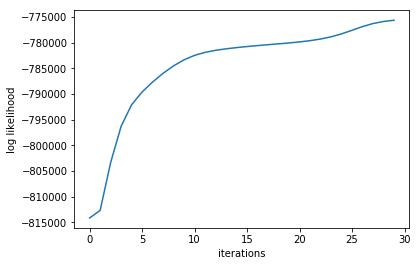

In [9]:
plt.figure()
plt.plot(gmm.LL)
plt.xlabel('iterations')
plt.ylabel('log likelihood')

In [10]:
gmm.m

array([[ 84.47171567,  83.06944089, 126.63580455],
       [ 99.85852776, 100.60765011, 128.59295663],
       [ 55.18186693,  53.86959595,  54.35560239],
       [192.91660141, 192.47947083, 125.0640365 ],
       [144.11228638, 146.80815244, 166.66908148]])

In [11]:
gmm.S

array([[[ 821.47370599,  828.68224391,  744.24862935],
        [ 828.68224391,  846.24619226,  746.94138562],
        [ 744.24862935,  746.94138562,  927.66133235]],

       [[1189.03795201, 1148.12399259,  928.36025459],
        [1148.12399259, 1129.22376491,  863.2524869 ],
        [ 928.36025459,  863.2524869 , 1227.14799608]],

       [[ 472.61159252,  456.53825404,  395.02066005],
        [ 456.53825404,  457.76227959,  402.20907736],
        [ 395.02066005,  402.20907736,  477.11490454]],

       [[1535.85072219, 1209.41094329,  423.43213581],
        [1209.41094329, 1239.60302515,  844.60598402],
        [ 423.43213581,  844.60598402, 1579.3882878 ]],

       [[2361.83380325, 2380.84879881, 1601.50196436],
        [2380.84879881, 2437.27854622, 1567.31929961],
        [1601.50196436, 1567.31929961, 1466.84516148]]])

In [12]:
gmm.w

array([[1.86039283e-01, 8.75662110e-03, 7.99253796e-01, 5.65583276e-06,
        5.94464447e-03],
       [1.05942812e-01, 1.21252296e-02, 8.77979816e-01, 9.66717121e-06,
        3.94247527e-03],
       [3.39587208e-02, 5.14191865e-03, 9.59951846e-01, 6.66612182e-06,
        9.40847985e-04],
       ...,
       [2.42377128e-03, 3.95904278e-01, 5.83427997e-05, 7.34745527e-02,
        5.28139055e-01],
       [1.53546169e-03, 3.31409754e-01, 1.67207887e-05, 6.90838524e-02,
        5.97954211e-01],
       [3.34752716e-03, 5.51435524e-01, 3.15243417e-03, 1.48946406e-01,
        2.93118108e-01]])

In [13]:
X_ml = gmm.predict()
X_ml = X_ml.reshape((h, w, -1))

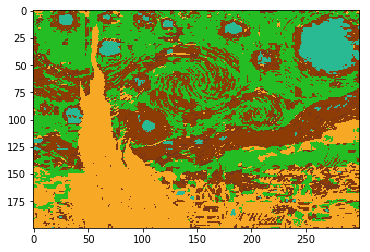

In [14]:
plt.imshow(X_ml)